# <span style='font-size:50px;background-color:yellow;'>&#128201;</span> <font color="#004080"> *Image Classification using CNN ::* </font>

## The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The task is to construct a CNN for CIFAR10 classification.

### (a) Fetch the training and test datasets for CIFAR10 using the built in functions in Tensorflow or Keras. Follow the links in Moodle, to know how to download the datasets --> 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
print("Shape of X_train : {}".format(np.shape(X_train)))
print("Shape of Y_train : {}".format(np.shape(Y_train)))
print("Shape of X_test : {}".format(np.shape(X_test)))
print("Shape of Y_test : {}".format(np.shape(Y_test)))

Shape of X_train : (50000, 32, 32, 3)
Shape of Y_train : (50000, 1)
Shape of X_test : (10000, 32, 32, 3)
Shape of Y_test : (10000, 1)


In [0]:
print(Y_train[0])
print(X_train[0])

[6]
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


### (b) Create a validation set of 10000 images from the training set -->

In [0]:
#shuffling the training dataset and creating validation dataset
new_indices = np.arange(0, X_train.shape[0])
np.random.shuffle(new_indices)

X_new = X_train[new_indices,:]
Y_new = Y_train[new_indices]

X_train = X_new[:40000]
Y_train = Y_new[:40000]
X_val = X_new[40000:]
Y_val = Y_new[40000:]


#Normalizing the dataset
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [0]:
print("Final shapes -->")
print("Shape of X_train : {}".format(np.shape(X_train)))
print("Shape of Y_train : {}".format(np.shape(Y_train)))
print("Shape of X_test : {}".format(np.shape(X_test)))
print("Shape of Y_test : {}".format(np.shape(Y_test)))
print("Shape of X_val : {}".format(np.shape(X_val)))
print("Shape of Y_val : {}".format(np.shape(Y_val)))

Final shapes -->
Shape of X_train : (40000, 32, 32, 3)
Shape of Y_train : (40000, 1)
Shape of X_test : (10000, 32, 32, 3)
Shape of Y_test : (10000, 1)
Shape of X_val : (10000, 32, 32, 3)
Shape of Y_val : (10000, 1)


### (c) Train the following CNN architectures as follows -->

In [0]:
learn_rate = 0.0001
iter = 150

In [0]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [0]:
def AccLoss(mod):
  lo, ac = mod.evaluate(X_train.astype(np.float32), Y_train)
  print("Train Loss: {}".format(lo))
  print("Train Accuracy: {}".format(ac)) 

  lo, ac = mod.evaluate(X_val.astype(np.float32), Y_val)
  print("Validation Loss: {}".format(lo))
  print("Validation Accuracy: {}".format(ac)) 

  lo, ac = mod.evaluate(X_test.astype(np.float32), Y_test)
  print("Test Loss: {}".format(lo))
  print("Test Accuracy: {}".format(ac)) 

In [0]:
def plotModel(i, ep):
  accuracy_lst = ep.history['acc']
  loss_lst = ep.history['loss']

  print("////////////////////////////////////////// Model {} //////////////////////////////////////////".format(i))

  plt.subplot(121)
  plt.plot(accuracy_lst, c='g')
  plt.xlabel('#iterations')
  plt.ylabel('Accuracy')
  plt.title("Accuracy Plot - Model {} ".format(i))

  plt.subplot(122)    
  plt.plot(loss_lst, c='r')
  plt.xlabel('#iterations')
  plt.ylabel('Loss')
  plt.title("Loss Plot - Model {} ".format(i))

  plt.subplots_adjust(right=1.7)
  plt.show()

  print("//////////////////////////////////////////////////////////////////////////////////////////////")

### (d) Model1 -->

In [0]:
model1 = tf.keras.Sequential([
    Conv2D(32, (5, 5), input_shape=X_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
print (model1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [0]:
opt = tf.keras.optimizers.Adam(learn_rate)
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epoc1 = model1.fit(X_train.astype(np.float32), Y_train, epochs = iter, verbose=2)

Train on 40000 samples
Epoch 1/150
40000/40000 - 8s - loss: 1.8294 - acc: 0.3474
Epoch 2/150
40000/40000 - 8s - loss: 1.5224 - acc: 0.4589
Epoch 3/150
40000/40000 - 8s - loss: 1.4091 - acc: 0.4985
Epoch 4/150
40000/40000 - 8s - loss: 1.3329 - acc: 0.5301
Epoch 5/150
40000/40000 - 8s - loss: 1.2786 - acc: 0.5497
Epoch 6/150
40000/40000 - 8s - loss: 1.2303 - acc: 0.5676
Epoch 7/150
40000/40000 - 8s - loss: 1.1864 - acc: 0.5855
Epoch 8/150
40000/40000 - 8s - loss: 1.1509 - acc: 0.5994
Epoch 9/150
40000/40000 - 8s - loss: 1.1187 - acc: 0.6122
Epoch 10/150
40000/40000 - 8s - loss: 1.0891 - acc: 0.6221
Epoch 11/150
40000/40000 - 8s - loss: 1.0627 - acc: 0.6320
Epoch 12/150
40000/40000 - 8s - loss: 1.0373 - acc: 0.6423
Epoch 13/150
40000/40000 - 8s - loss: 1.0127 - acc: 0.6503
Epoch 14/150
40000/40000 - 8s - loss: 0.9910 - acc: 0.6574
Epoch 15/150
40000/40000 - 8s - loss: 0.9733 - acc: 0.6642
Epoch 16/150
40000/40000 - 8s - loss: 0.9485 - acc: 0.6722
Epoch 17/150
40000/40000 - 8s - loss: 0.93

In [0]:
AccLoss(model1)

40000/40000 [==============================] - 4s 112us/sample - loss: 0.0278 - acc: 0.9968
Train Loss: 0.027817732039652765
Train Accuracy: 0.9967749714851379
10000/10000 [==============================] - 1s 110us/sample - loss: 2.6316 - acc: 0.6504
Validation Loss: 2.631630817890167
Validation Accuracy: 0.6503999829292297
10000/10000 [==============================] - 1s 110us/sample - loss: 2.6158 - acc: 0.6542
Test Loss: 2.6157985450744627
Test Accuracy: 0.65420001745224


### (e) Model2 -->

In [0]:
model2 = tf.keras.Sequential([
    Conv2D(32, (5, 5), input_shape=X_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
print (model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 5, 5, 64)          51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [0]:
opt = tf.keras.optimizers.Adam(learn_rate)
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epoc2 = model2.fit(X_train.astype(np.float32), Y_train, epochs = iter, verbose=2)

Train on 40000 samples
Epoch 1/150
40000/40000 - 7s - loss: 2.0319 - acc: 0.2606
Epoch 2/150
40000/40000 - 7s - loss: 1.7742 - acc: 0.3622
Epoch 3/150
40000/40000 - 7s - loss: 1.6574 - acc: 0.4092
Epoch 4/150
40000/40000 - 7s - loss: 1.5845 - acc: 0.4333
Epoch 5/150
40000/40000 - 7s - loss: 1.5319 - acc: 0.4533
Epoch 6/150
40000/40000 - 7s - loss: 1.4897 - acc: 0.4697
Epoch 7/150
40000/40000 - 7s - loss: 1.4506 - acc: 0.4859
Epoch 8/150
40000/40000 - 7s - loss: 1.4170 - acc: 0.4992
Epoch 9/150
40000/40000 - 7s - loss: 1.3895 - acc: 0.5084
Epoch 10/150
40000/40000 - 7s - loss: 1.3650 - acc: 0.5177
Epoch 11/150
40000/40000 - 7s - loss: 1.3400 - acc: 0.5305
Epoch 12/150
40000/40000 - 7s - loss: 1.3186 - acc: 0.5366
Epoch 13/150
40000/40000 - 7s - loss: 1.2986 - acc: 0.5434
Epoch 14/150
40000/40000 - 7s - loss: 1.2793 - acc: 0.5527
Epoch 15/150
40000/40000 - 7s - loss: 1.2604 - acc: 0.5574
Epoch 16/150
40000/40000 - 7s - loss: 1.2425 - acc: 0.5656
Epoch 17/150
40000/40000 - 7s - loss: 1.22

In [0]:
AccLoss(model2)

40000/40000 [==============================] - 4s 105us/sample - loss: 0.4941 - acc: 0.8390
Train Loss: 0.4941321942329407
Train Accuracy: 0.8390499949455261
10000/10000 [==============================] - 1s 105us/sample - loss: 1.3280 - acc: 0.6141
Validation Loss: 1.3279580839157104
Validation Accuracy: 0.6140999794006348
10000/10000 [==============================] - 1s 104us/sample - loss: 1.2967 - acc: 0.6292
Test Loss: 1.296721460723877
Test Accuracy: 0.6291999816894531


### (f) Model3 -->

In [0]:
model3 = tf.keras.Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
print (model3.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [0]:
opt = tf.keras.optimizers.Adam(learn_rate)
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epoc3 = model3.fit(X_train.astype(np.float32), Y_train, epochs = iter, verbose=2)

Train on 40000 samples
Epoch 1/150
40000/40000 - 7s - loss: 1.8300 - acc: 0.3512
Epoch 2/150
40000/40000 - 7s - loss: 1.5116 - acc: 0.4663
Epoch 3/150
40000/40000 - 7s - loss: 1.3921 - acc: 0.5086
Epoch 4/150
40000/40000 - 7s - loss: 1.3112 - acc: 0.5407
Epoch 5/150
40000/40000 - 7s - loss: 1.2547 - acc: 0.5629
Epoch 6/150
40000/40000 - 8s - loss: 1.2068 - acc: 0.5788
Epoch 7/150
40000/40000 - 7s - loss: 1.1696 - acc: 0.5942
Epoch 8/150
40000/40000 - 7s - loss: 1.1371 - acc: 0.6064
Epoch 9/150
40000/40000 - 7s - loss: 1.1078 - acc: 0.6160
Epoch 10/150
40000/40000 - 7s - loss: 1.0818 - acc: 0.6264
Epoch 11/150
40000/40000 - 7s - loss: 1.0574 - acc: 0.6345
Epoch 12/150
40000/40000 - 7s - loss: 1.0370 - acc: 0.6416
Epoch 13/150
40000/40000 - 7s - loss: 1.0169 - acc: 0.6501
Epoch 14/150
40000/40000 - 7s - loss: 0.9972 - acc: 0.6578
Epoch 15/150
40000/40000 - 7s - loss: 0.9782 - acc: 0.6651
Epoch 16/150
40000/40000 - 7s - loss: 0.9600 - acc: 0.6717
Epoch 17/150
40000/40000 - 7s - loss: 0.94

In [0]:
AccLoss(model3)

40000/40000 [==============================] - 4s 109us/sample - loss: 0.0661 - acc: 0.9884
Train Loss: 0.06607104171067477
Train Accuracy: 0.9883999824523926
10000/10000 [==============================] - 1s 107us/sample - loss: 2.1628 - acc: 0.6506
Validation Loss: 2.162808573913574
Validation Accuracy: 0.650600016117096
10000/10000 [==============================] - 1s 108us/sample - loss: 2.0973 - acc: 0.6571
Test Loss: 2.0972885204315186
Test Accuracy: 0.6571000218391418


### (g) Model4 -->

In [0]:
model4 = tf.keras.Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
print (model4.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)              

In [0]:
opt = tf.keras.optimizers.Adam(learn_rate)
model4.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epoc4 = model4.fit(X_train.astype(np.float32), Y_train, epochs = iter, verbose=2)

Train on 40000 samples
Epoch 1/150
40000/40000 - 9s - loss: 1.8994 - acc: 0.3126
Epoch 2/150
40000/40000 - 9s - loss: 1.5829 - acc: 0.4300
Epoch 3/150
40000/40000 - 9s - loss: 1.4616 - acc: 0.4753
Epoch 4/150
40000/40000 - 8s - loss: 1.3851 - acc: 0.5071
Epoch 5/150
40000/40000 - 9s - loss: 1.3259 - acc: 0.5302
Epoch 6/150
40000/40000 - 8s - loss: 1.2748 - acc: 0.5497
Epoch 7/150
40000/40000 - 9s - loss: 1.2312 - acc: 0.5678
Epoch 8/150
40000/40000 - 8s - loss: 1.1941 - acc: 0.5812
Epoch 9/150
40000/40000 - 8s - loss: 1.1589 - acc: 0.5952
Epoch 10/150
40000/40000 - 9s - loss: 1.1315 - acc: 0.6060
Epoch 11/150
40000/40000 - 9s - loss: 1.0991 - acc: 0.6189
Epoch 12/150
40000/40000 - 8s - loss: 1.0754 - acc: 0.6251
Epoch 13/150
40000/40000 - 8s - loss: 1.0502 - acc: 0.6364
Epoch 14/150
40000/40000 - 9s - loss: 1.0269 - acc: 0.6438
Epoch 15/150
40000/40000 - 9s - loss: 1.0087 - acc: 0.6523
Epoch 16/150
40000/40000 - 9s - loss: 0.9852 - acc: 0.6607
Epoch 17/150
40000/40000 - 9s - loss: 0.96

In [0]:
AccLoss(model4)

40000/40000 [==============================] - 5s 121us/sample - loss: 0.0166 - acc: 0.9982
Train Loss: 0.016618492696573957
Train Accuracy: 0.9982249736785889
10000/10000 [==============================] - 1s 122us/sample - loss: 2.7163 - acc: 0.6682
Validation Loss: 2.7163164659500123
Validation Accuracy: 0.6682000160217285
10000/10000 [==============================] - 1s 119us/sample - loss: 2.6417 - acc: 0.6745
Test Loss: 2.6416996269226076
Test Accuracy: 0.6744999885559082


### (h) Which the best model among model1 to model4? Why? -->

Model 4, is the best as it gives out the best test and train accuracy for the given set of hyperparameters(change of hyperparameters might cause change of best model, as accuracies/loss of models are close).
Moreover, one reason can be, as it has sufficiently high parameters to increase complexity of network to improve learning, and also one extra layer added to it might give it an extra edge over other models.

### (i) Model5 -->

In [0]:
# Model 4 was the best uptill now, but since "ValueError : Negative dimension size caused by ... " occured 
# model 3 is used to generate model 5 instead of model 4. 

model5 = tf.keras.Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
print (model5.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [0]:
opt = tf.keras.optimizers.Adam(learn_rate)
model5.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epoc5 = model5.fit(X_train.astype(np.float32), Y_train, epochs = iter, verbose=2)

Train on 40000 samples
Epoch 1/150
40000/40000 - 6s - loss: 2.1372 - acc: 0.2143
Epoch 2/150
40000/40000 - 5s - loss: 1.9542 - acc: 0.2855
Epoch 3/150
40000/40000 - 5s - loss: 1.8634 - acc: 0.3158
Epoch 4/150
40000/40000 - 5s - loss: 1.8082 - acc: 0.3340
Epoch 5/150
40000/40000 - 5s - loss: 1.7687 - acc: 0.3478
Epoch 6/150
40000/40000 - 5s - loss: 1.7367 - acc: 0.3623
Epoch 7/150
40000/40000 - 5s - loss: 1.7084 - acc: 0.3739
Epoch 8/150
40000/40000 - 5s - loss: 1.6837 - acc: 0.3864
Epoch 9/150
40000/40000 - 5s - loss: 1.6624 - acc: 0.3961
Epoch 10/150
40000/40000 - 5s - loss: 1.6433 - acc: 0.4017
Epoch 11/150
40000/40000 - 5s - loss: 1.6258 - acc: 0.4106
Epoch 12/150
40000/40000 - 6s - loss: 1.6107 - acc: 0.4183
Epoch 13/150
40000/40000 - 5s - loss: 1.5960 - acc: 0.4234
Epoch 14/150
40000/40000 - 5s - loss: 1.5833 - acc: 0.4304
Epoch 15/150
40000/40000 - 5s - loss: 1.5704 - acc: 0.4367
Epoch 16/150
40000/40000 - 5s - loss: 1.5585 - acc: 0.4403
Epoch 17/150
40000/40000 - 5s - loss: 1.54

In [0]:
AccLoss(model5)

40000/40000 [==============================] - 4s 92us/sample - loss: 1.0615 - acc: 0.6286
Train Loss: 1.0614914514541627
Train Accuracy: 0.6285750269889832
10000/10000 [==============================] - 1s 93us/sample - loss: 1.3453 - acc: 0.5362
Validation Loss: 1.345314757347107
Validation Accuracy: 0.5361999869346619
10000/10000 [==============================] - 1s 90us/sample - loss: 1.3269 - acc: 0.5493
Test Loss: 1.326860289001465
Test Accuracy: 0.5493000149726868


### (j) Model6 -->

In [0]:
#best model among first four of them was model 4. So we derive model 6 using model 4.

model6 = tf.keras.Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
print (model6.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2048)            

In [0]:
opt = tf.keras.optimizers.Adam(learn_rate)
model6.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epoc6 = model6.fit(X_train.astype(np.float32), Y_train, epochs = iter, verbose=2)

Train on 40000 samples
Epoch 1/150
40000/40000 - 9s - loss: 1.8297 - acc: 0.3444
Epoch 2/150
40000/40000 - 9s - loss: 1.4913 - acc: 0.4713
Epoch 3/150
40000/40000 - 9s - loss: 1.3574 - acc: 0.5173
Epoch 4/150
40000/40000 - 9s - loss: 1.2647 - acc: 0.5555
Epoch 5/150
40000/40000 - 9s - loss: 1.1968 - acc: 0.5811
Epoch 6/150
40000/40000 - 9s - loss: 1.1386 - acc: 0.6046
Epoch 7/150
40000/40000 - 9s - loss: 1.0937 - acc: 0.6207
Epoch 8/150
40000/40000 - 9s - loss: 1.0500 - acc: 0.6362
Epoch 9/150
40000/40000 - 9s - loss: 1.0133 - acc: 0.6490
Epoch 10/150
40000/40000 - 9s - loss: 0.9775 - acc: 0.6620
Epoch 11/150
40000/40000 - 9s - loss: 0.9473 - acc: 0.6744
Epoch 12/150
40000/40000 - 9s - loss: 0.9188 - acc: 0.6819
Epoch 13/150
40000/40000 - 9s - loss: 0.8931 - acc: 0.6909
Epoch 14/150
40000/40000 - 9s - loss: 0.8658 - acc: 0.7010
Epoch 15/150
40000/40000 - 9s - loss: 0.8459 - acc: 0.7102
Epoch 16/150
40000/40000 - 9s - loss: 0.8209 - acc: 0.7180
Epoch 17/150
40000/40000 - 8s - loss: 0.80

In [0]:
AccLoss(model6)

40000/40000 [==============================] - 5s 126us/sample - loss: 0.0033 - acc: 0.9999
Train Loss: 0.003329296338337008
Train Accuracy: 0.9999250173568726
10000/10000 [==============================] - 1s 125us/sample - loss: 2.7803 - acc: 0.7003
Validation Loss: 2.7803127099990843
Validation Accuracy: 0.7002999782562256
10000/10000 [==============================] - 1s 127us/sample - loss: 2.8562 - acc: 0.6987
Test Loss: 2.8561736528396606
Test Accuracy: 0.6987000107765198


### (k) Model7 -->

In [0]:
# Model 4 was the best among first four models, but since "ValueError : Negative dimension size caused by ... " occured 
# model 3 is used to generate model 7 instead of model 4. 

model7 = tf.keras.Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], strides=(2, 2), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
print (model7.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_28 (Dense)             (None, 10)              

In [0]:
opt = tf.keras.optimizers.Adam(learn_rate)
model7.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epoc7 = model7.fit(X_train.astype(np.float32), Y_train, epochs = iter, verbose=2)

Train on 40000 samples
Epoch 1/150
40000/40000 - 6s - loss: 2.0557 - acc: 0.2656
Epoch 2/150
40000/40000 - 6s - loss: 1.7739 - acc: 0.3713
Epoch 3/150
40000/40000 - 6s - loss: 1.6715 - acc: 0.4004
Epoch 4/150
40000/40000 - 6s - loss: 1.6040 - acc: 0.4209
Epoch 5/150
40000/40000 - 6s - loss: 1.5502 - acc: 0.4430
Epoch 6/150
40000/40000 - 6s - loss: 1.5055 - acc: 0.4564
Epoch 7/150
40000/40000 - 6s - loss: 1.4677 - acc: 0.4726
Epoch 8/150
40000/40000 - 6s - loss: 1.4355 - acc: 0.4843
Epoch 9/150
40000/40000 - 6s - loss: 1.4045 - acc: 0.4962
Epoch 10/150
40000/40000 - 6s - loss: 1.3813 - acc: 0.5047
Epoch 11/150
40000/40000 - 6s - loss: 1.3583 - acc: 0.5159
Epoch 12/150
40000/40000 - 6s - loss: 1.3377 - acc: 0.5221
Epoch 13/150
40000/40000 - 6s - loss: 1.3210 - acc: 0.5300
Epoch 14/150
40000/40000 - 6s - loss: 1.3040 - acc: 0.5362
Epoch 15/150
40000/40000 - 6s - loss: 1.2860 - acc: 0.5437
Epoch 16/150
40000/40000 - 6s - loss: 1.2712 - acc: 0.5496
Epoch 17/150
40000/40000 - 6s - loss: 1.25

In [0]:
AccLoss(model7)

40000/40000 [==============================] - 4s 100us/sample - loss: 0.6946 - acc: 0.7593
Train Loss: 0.694599437904358
Train Accuracy: 0.7593250274658203
10000/10000 [==============================] - 1s 99us/sample - loss: 1.0800 - acc: 0.6401
Validation Loss: 1.0799526344299317
Validation Accuracy: 0.6401000022888184
10000/10000 [==============================] - 1s 98us/sample - loss: 1.0551 - acc: 0.6518
Test Loss: 1.055070230102539
Test Accuracy: 0.6517999768257141


### (l) Which the best model among model1 to model7? Why? -->

Model 6 is the best model, with best test and validation accuracy. Moreover, model 6 doesn't have striding of (2x2), while model 5, 7 have.

### (m) Model8 -->

In [0]:
#best model among first seven of them was model 6. So we derive model 8 using model 6.

model8 = tf.keras.Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])
print (model8.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 2048)            

In [0]:
opt = tf.keras.optimizers.Adam(learn_rate)
model8.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epoc8 = model8.fit(X_train.astype(np.float32), Y_train, epochs = iter, verbose=2)

Train on 40000 samples
Epoch 1/150
40000/40000 - 10s - loss: 1.7000 - acc: 0.3933
Epoch 2/150
40000/40000 - 9s - loss: 1.4073 - acc: 0.5050
Epoch 3/150
40000/40000 - 9s - loss: 1.2603 - acc: 0.5587
Epoch 4/150
40000/40000 - 9s - loss: 1.1570 - acc: 0.5972
Epoch 5/150
40000/40000 - 9s - loss: 1.0768 - acc: 0.6253
Epoch 6/150
40000/40000 - 9s - loss: 1.0108 - acc: 0.6482
Epoch 7/150
40000/40000 - 9s - loss: 0.9590 - acc: 0.6665
Epoch 8/150
40000/40000 - 9s - loss: 0.9174 - acc: 0.6829
Epoch 9/150
40000/40000 - 9s - loss: 0.8763 - acc: 0.6983
Epoch 10/150
40000/40000 - 9s - loss: 0.8428 - acc: 0.7099
Epoch 11/150
40000/40000 - 9s - loss: 0.8087 - acc: 0.7229
Epoch 12/150
40000/40000 - 9s - loss: 0.7816 - acc: 0.7331
Epoch 13/150
40000/40000 - 9s - loss: 0.7533 - acc: 0.7426
Epoch 14/150
40000/40000 - 9s - loss: 0.7278 - acc: 0.7526
Epoch 15/150
40000/40000 - 9s - loss: 0.7020 - acc: 0.7613
Epoch 16/150
40000/40000 - 9s - loss: 0.6784 - acc: 0.7699
Epoch 17/150
40000/40000 - 9s - loss: 0.6

In [0]:
AccLoss(model8)

40000/40000 [==============================] - 5s 134us/sample - loss: 3.7518e-04 - acc: 1.0000
Train Loss: 0.00037517513507045807
Train Accuracy: 1.0
10000/10000 [==============================] - 1s 131us/sample - loss: 2.0721 - acc: 0.7027
Validation Loss: 2.0720760880470275
Validation Accuracy: 0.7027000188827515
10000/10000 [==============================] - 1s 134us/sample - loss: 2.0341 - acc: 0.7086
Test Loss: 2.0340833958625795
Test Accuracy: 0.7085999846458435


### (n) Model 9 -->

In [0]:
#best model among first seven of them was model 6. So we derive model 9 using model 6.

model9 = tf.keras.Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation='sigmoid'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='sigmoid'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='sigmoid'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])
print (model9.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2048)            

In [0]:
opt = tf.keras.optimizers.Adam(learn_rate)
model9.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epoc9 = model9.fit(X_train.astype(np.float32), Y_train, epochs = iter, verbose=2)

Train on 40000 samples
Epoch 1/150
40000/40000 - 10s - loss: 2.3094 - acc: 0.1020
Epoch 2/150
40000/40000 - 9s - loss: 2.1887 - acc: 0.1862
Epoch 3/150
40000/40000 - 9s - loss: 2.0250 - acc: 0.2706
Epoch 4/150
40000/40000 - 9s - loss: 1.9616 - acc: 0.3011
Epoch 5/150
40000/40000 - 9s - loss: 1.9021 - acc: 0.3225
Epoch 6/150
40000/40000 - 9s - loss: 1.8501 - acc: 0.3369
Epoch 7/150
40000/40000 - 9s - loss: 1.7993 - acc: 0.3533
Epoch 8/150
40000/40000 - 9s - loss: 1.7505 - acc: 0.3692
Epoch 9/150
40000/40000 - 9s - loss: 1.7058 - acc: 0.3882
Epoch 10/150
40000/40000 - 9s - loss: 1.6700 - acc: 0.3991
Epoch 11/150
40000/40000 - 9s - loss: 1.6383 - acc: 0.4119
Epoch 12/150
40000/40000 - 9s - loss: 1.6132 - acc: 0.4217
Epoch 13/150
40000/40000 - 9s - loss: 1.5893 - acc: 0.4304
Epoch 14/150
40000/40000 - 9s - loss: 1.5678 - acc: 0.4409
Epoch 15/150
40000/40000 - 9s - loss: 1.5492 - acc: 0.4484
Epoch 16/150
40000/40000 - 9s - loss: 1.5306 - acc: 0.4567
Epoch 17/150
40000/40000 - 9s - loss: 1.5

In [0]:
AccLoss(model9)

40000/40000 [==============================] - 6s 141us/sample - loss: 0.6637 - acc: 0.7786
Train Loss: 0.6637193534135819
Train Accuracy: 0.7785750031471252
10000/10000 [==============================] - 1s 133us/sample - loss: 1.0738 - acc: 0.6338
Validation Loss: 1.0737666528701781
Validation Accuracy: 0.6338000297546387
10000/10000 [==============================] - 1s 136us/sample - loss: 1.0571 - acc: 0.6338
Test Loss: 1.0571018900871276
Test Accuracy: 0.6338000297546387


### (o) For each model trained, plot the loss vs iteration curve & accuracy vs iteration curve for training data -->

////////////////////////////////////////// Model 1 //////////////////////////////////////////


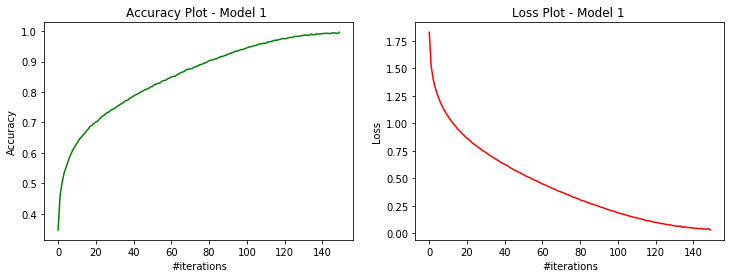

//////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////// Model 2 //////////////////////////////////////////


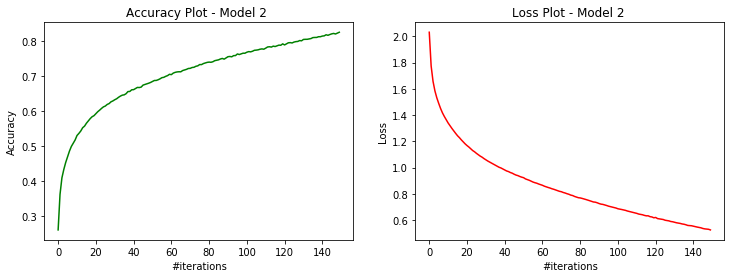

//////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////// Model 3 //////////////////////////////////////////


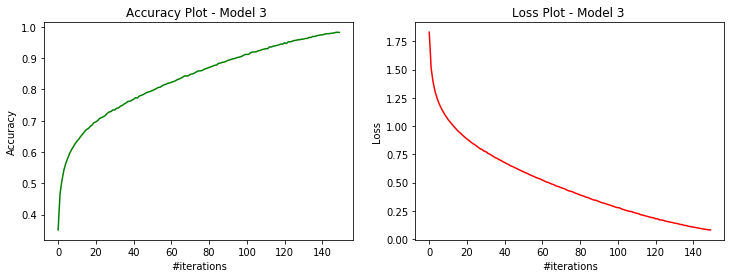

//////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////// Model 4 //////////////////////////////////////////


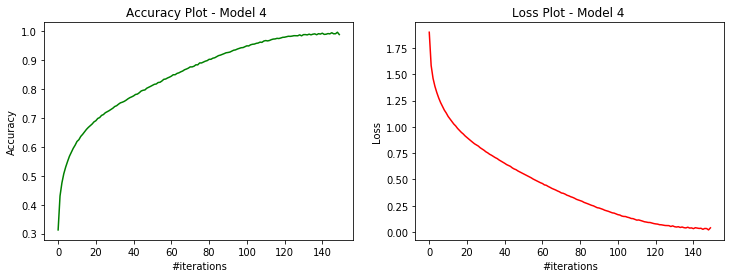

//////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////// Model 5 //////////////////////////////////////////


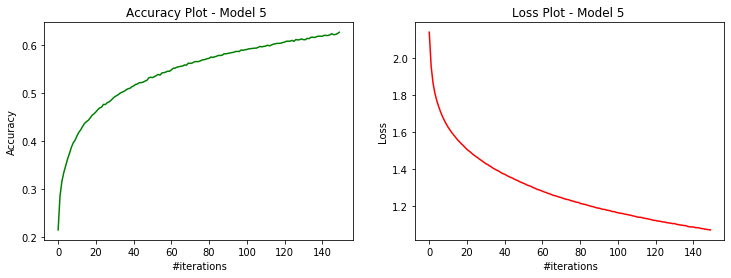

//////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////// Model 6 //////////////////////////////////////////


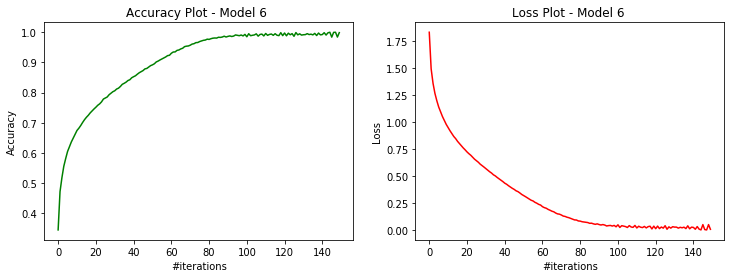

//////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////// Model 7 //////////////////////////////////////////


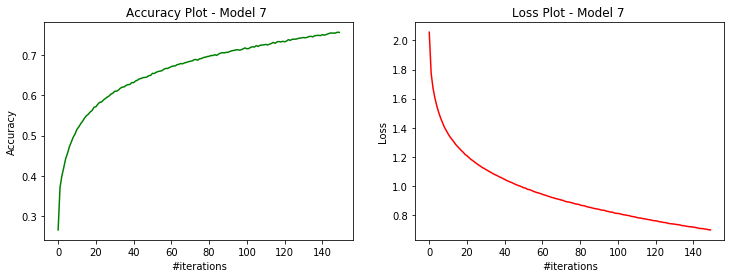

//////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////// Model 8 //////////////////////////////////////////


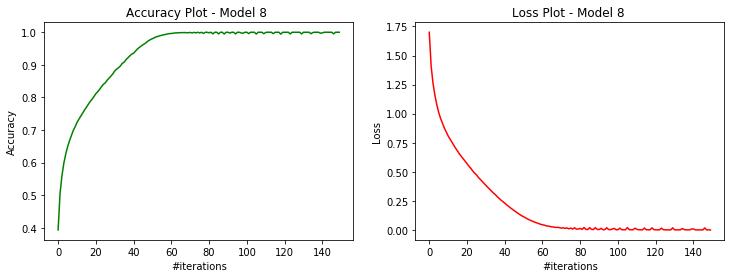

//////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////// Model 9 //////////////////////////////////////////


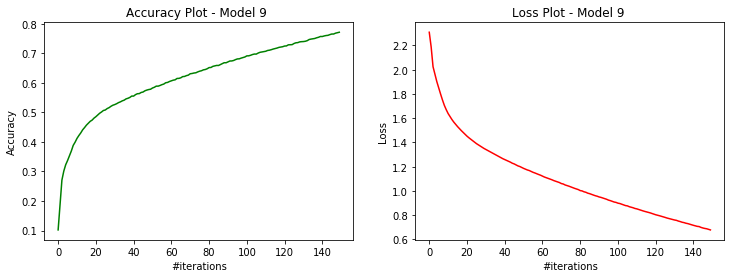

//////////////////////////////////////////////////////////////////////////////////////////////


In [0]:
E = [epoc1,epoc2,epoc3,epoc4,epoc5,epoc6,epoc7,epoc8,epoc9]
for i in range(1,10):
  plotModel(i, E[i-1])

### (p) Tabulate the following for model 1 to model 9. You can create the table by hand and then upload the screenshot of the table in the jupyter notebook : Total number of trainable parameters, Training time, Training accuracy, Validation accuracy, Test accuracy -->

Model Comparision Table : [Github](https://github.com/RathoreDevansh08/DeepLearning-CS5007/blob/master/CNN_RNN_LSTM_GRU/ImageClass_CNN_CIFAR-10.png), [GoogleSheets](https://docs.google.com/spreadsheets/d/1r4xzGdKC_84xB_4DyESBPmcQ1UgL_ply-_p99_6TO78/edit?usp=sharing), [GoogleDrive](https://drive.google.com/open?id=1pkE-_5hWDNACH6pqJSI-7mmmiEjKeA0y)

In [101]:
from google.colab import files
files.upload()

Saving ImageClass_CNN_CIFAR-10.png to ImageClass_CNN_CIFAR-10.png


{'ImageClass_CNN_CIFAR-10.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x98\x00\x00\x00\xe0\x08\x06\x00\x00\x00fQ\xc9\x8c\x00\x00\x00\x89zTXtRaw profile type exif\x00\x00x\xdaU\x8e\xd1\r\xc30\x08D\xff\x99\xa2#`\xc0\x07\x8cSE\x8e\xd4\r:~q\x9c\xca\xca\xfb\x80\xd3\t\x1dG\xe3\xfb9\xe95i,d\xdd\x03\tpai)\xef\x12\xc1\x0ben\xc2m\xee\x9a\x8b{k+%\xdb&\x95%\x90\xe1l\xfb\xd0n\xffOW\x04N7wt\x1c8\xa4\xd2e\xa8^\xb3ni\xa6\xf2\xac\x91;$\xe3\xeaPo\x9f\xfexf3\xfd\x00E\xad,U\x9db\x9a\xf6\x00\x00\n\x06iTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 4.4.0-Exiv2">\n <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n  <rdf:Description rdf:about=""\n    xmlns:exif="http://ns.adobe.com/exif/1.0/"\n    xmlns:tiff="http://ns.adobe.com/tiff/1.0/"\n   exif:PixelXDimension="920"\n   exif:PixelYDimension="224"\n   tiff:ImageWidth="920"\n   tiff:ImageHeight="224"\n   tiff:Orientatio

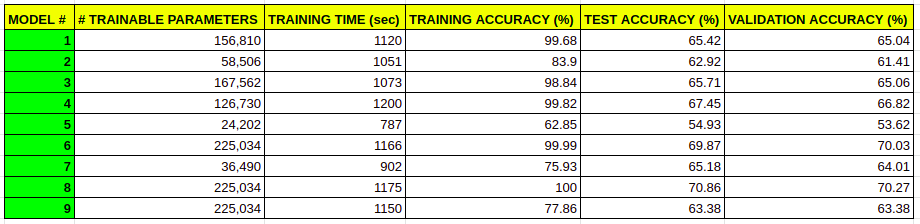

In [105]:
from IPython.display import Image
Image('ImageClass_CNN_CIFAR-10.png')